# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### **1. Откройте файл с данными и изучите общую информацию.**

Для понтятного чтения таблицы необходимо установить разделитель столбцов, sep=\t.

In [1]:
#Импортируем библиотеку Pandas и сохраним датасет в переменной data
#Для построения графиков сразу импортируем нужную библиотеку

import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

### **2. Изучим общую информацию о датасете.**

In [2]:
#Выведем информацию о столбцах в датасете и выведем первые 10 строк

data.info()
print(data.head(10))
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В многих стобцах таблицы есть пропуски, необходимо выяснить их происхождение и обработать их.

### **3. Постройте общую гистограмму для всех числовых столбцов таблицы.**

Для наглядности распределения данных построим гистограммы по стобцам.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

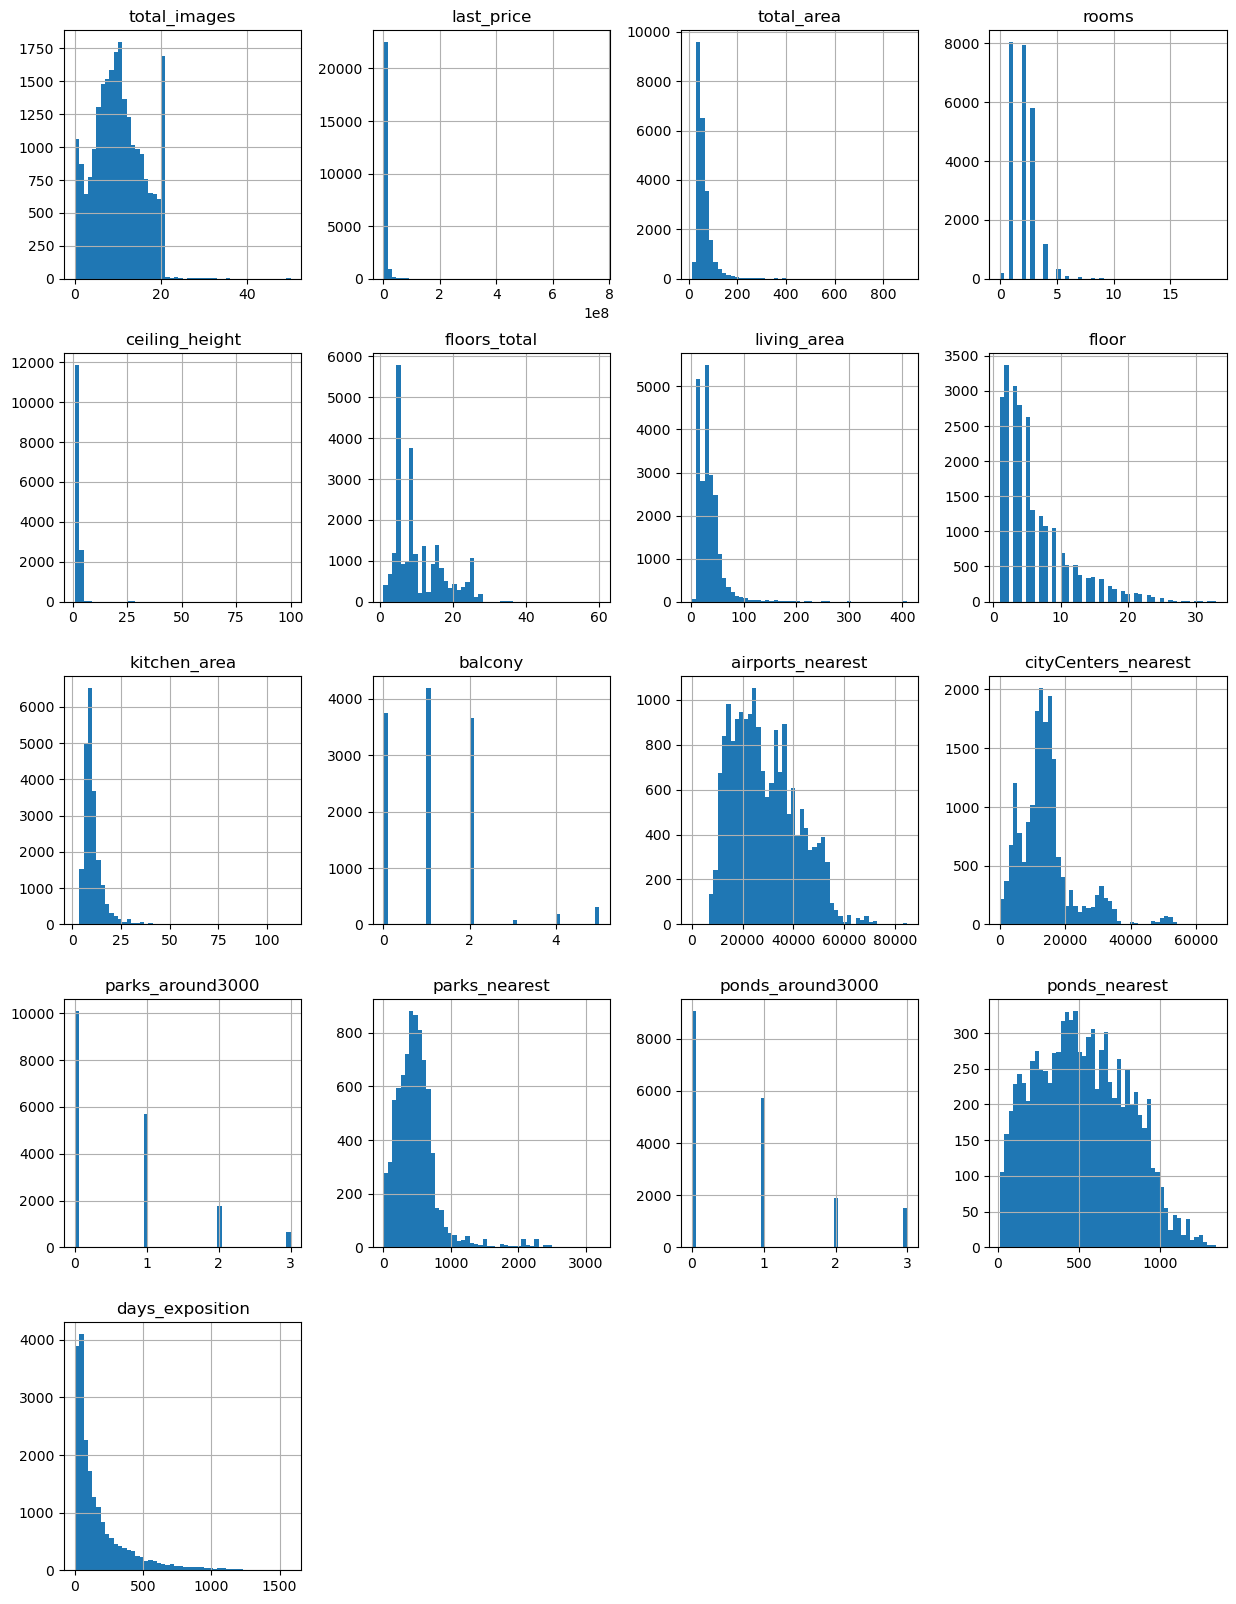

In [3]:
#Посроим гистограммы для всего датафрейма

data.hist(figsize=(15,20), bins=50)

В некоторых слобцах можно наблюдать странное распределение данных, они могут быть связаны с пропусками, дубликатами или с искажением данных (столбцы - last_price, ceiling_height, days_exposition).

## Предобработка данных

### **1. Найдите и изучите пропущенные значения в столбцах:**

Найдем общее количество пропущенных значений по столбцам.

In [4]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**Пропуски есть в столбцах:**

- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area             
- balcony                 
- locality_name        
- airports_nearest    
- cityCenters_nearest  
- parks_around3000   
- parks_nearest      
- ponds_around3000 
- ponds_nearest
- days_exposition 

Рассмотрим причины пропусков и обработаем их, если возможно.

- **Пропущенные значения в столбце ceiling_height**.

Возможно пропуски в столбце связаны с тем, что это был не обязательный пункт, для публикации объявления. 
Рассмотрим зависимость количества пропусков от времени.

In [5]:
#Добавим столбец с датами в наш датафрейм

data['date'] = pd.to_datetime(data['first_day_exposition'])

#Добавим столбец с годом и месяцем, для удобства визуализации

data['year_month'] =\
pd.to_datetime(data['date']\
               .dt.year.astype(str) + '-' + data['date'].dt.month.astype(str))

Визуализируем зависимость пропусков от времени публикации объявления.

In [6]:
#Создадим переменную, в которой сгруппируем данные по дате,
#c помощью lambda найдём медианное значение пропусков в столбце ceiling_height

time_heig = data.groupby('year_month')\
.apply(lambda data: data['ceiling_height'].isna().mean())

<AxesSubplot:xlabel='year_month'>

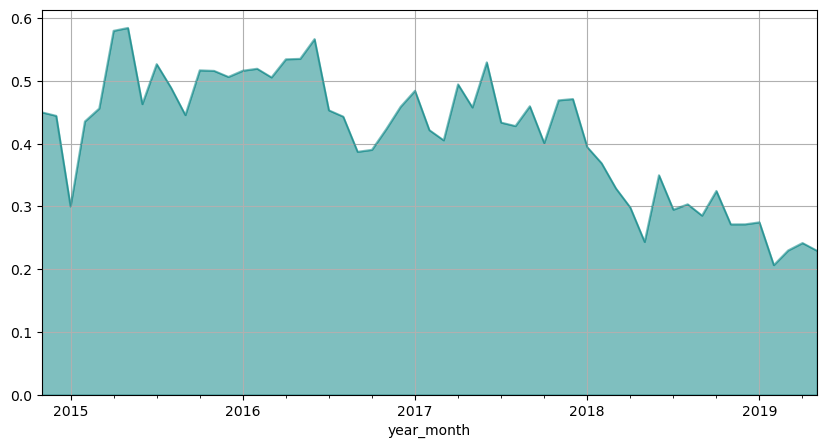

In [7]:
#Построим линейный график по годам

time_heig.plot(kind='area', figsize=(10,5), grid=True, alpha=0.5, color='teal')

По графику видно, что с количество пропусков снижается с годами. Вероятно в конце 2017 года на сайте внесли изменения, которые побудили пользователей указывать высоту потолков в объявлении (например: подняли выбор высоты потолка вверх, к важным показателям квартиры).

Пропуски в столбце заполним медианным значением.

Для этого необходимо проверить наличие выбивающихся значений, исправить их или удалить.

In [8]:
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

В столбце есть выбивающиеся значения, некоторые из них возможно связаны с ошибкой записи, исправим их (14, 27, 25).

In [9]:
#С помощью метода replace исправим выбивающиеся значения

data['ceiling_height'] = data['ceiling_height']\
.replace([14.0,26.0,27.0,22.6,32.0,24.0,27.5,20.0,25.0,],[1.4,2.6,2.7,2.26,3.2,2.4,2.75,2.0,2.5])

Осталось значение 100.0, оно в одной строке, его проще удалить.

In [10]:
#Удалим строку с помощью метода drop, рпередадим в него значение индекса строки.

print(data.loc[data['ceiling_height'] == 100]['ceiling_height'])
data['ceiling_height'] = data['ceiling_height'].drop(index=[22869], axis=0)

22869    100.0
Name: ceiling_height, dtype: float64


Теперь в столбце адекватные значения и можно без риска ошибки заполнить пропуски медианным значением.

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Для более корректного анализа удилим строки со значением высоты потолков меньше 2.1 метров. В жилом помещении высота потолков должна быть не менее 2.1 метра.

In [12]:
#Удалим строки со значениями менее 2.1, проверим результат.

data['ceiling_height'] = data['ceiling_height'].where(~(data['ceiling_height'] <2.1),2.1)
print(data['ceiling_height'].unique())

[ 2.7   2.65  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5   3.3
  2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54  2.51
  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.1   2.45  3.6
  2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74  2.96
  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83  4.7
  2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48  2.62
  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66  3.85
  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37  3.09
  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27  4.1
  2.93  3.46  3.47  3.33  3.63  3.32  8.3   2.98  2.86  3.17  4.4   3.28
  3.04  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3   3.39  2.69
  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49  4.14  2.91  3.88
  4.25  3.29  2.25  3.76  3.69  6.    2.26  2.89  3.58 

- **Пропуски в столбце is_apartment**.

In [13]:
#Найдем количество известных значений в стобце is_apartment

print(data['is_apartment'].value_counts())
data = data.drop(columns=['is_apartment'], axis=1)

False    2725
True       50
Name: is_apartment, dtype: int64


В столбце is_apartment большая часть значений пропущены, т.к. эти значения не понадобятся в нашем анализе, этот столбец можно удалить. Пропуски могут связаны с тем, что данные у нас с 2017 года и на тот момент апартаменты еще не были сильно распространены.

- **Рассмотрим пропуски в столбце balcony**.

Пропуски в столбцах balcony можно заполнить. В столбце balcony пропуски веротно означают отсутствие балконов,продавец мог их просто не указать, их можно заполнить значением 0.

In [14]:
#Заполним пропуски в столбце balcony и проверим результат. 

data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


- **Вероятно расстояние до аэропорта airports_nearest не указано продавцов недвижимости в Лен. области.**

In [15]:
#С помощью логической индесации найдём количество значений локаций,
#принадлежащих пропускам в airports_nearest, но не являющиеся Санкт-Петербургом

data.loc[(data['airports_nearest'].isna() == True)\
         & (data['locality_name'] != 'Санкт-Петербург')]\
        ['locality_name'].count()

5449

Из вычислений видно, что 5449 из 5542 пропусков в столбце **airports_nearest** у продавцов недвижимости в Лен. области. Расстояние до аэропорта получено из картографических источников и вероятно, у объявлений в области расстояние не подсчитывается. В остальных случаях возможно произошла ошибка на картографическом сервисе.

- **Посмотрим на пропуске в столбце cityCenters_nearest**.

Эти пропуски возможно так же связаны с тем, что картографический сервис не смог рассчитать расстояние до центра у объявлений, находящихся в Лен. области. Так же возможен сбой в картографической системе.

In [16]:
'''
#С помощью логической индесации найдём количество значений локаций,
#принадлежащих пропускам в cityCenters_nearest,
#но не являющиеся Санкт-Петербургом
'''
data.loc[(data['cityCenters_nearest'].isna() == True)\
         & (data['locality_name'] != 'Санкт-Петербург')]\
        ['locality_name'].count()

5450

Большая часть пропусков, как видно, связаны с локацией объявления в Лен. области. Вероятно автоматически картографические данные для этих пунктов невозможно получить автоматически, поэтому они остаются пустыми.

- **Найдём зависимость в столбцах количетсва парков и водоёмов (*parks_around3000, ponds_around3000, parks_nearest, ponds_nearest*) и расстояния до них.**

In [17]:
#Найдём количество пропусков в столбцах parks_nearest и ponds_nearest,
#если в соответсующих столбцах parks_around3000 и ponds_around3000 равно 0.0

print(data.loc[data['parks_around3000'] == 0.0]['parks_nearest'].isna().sum())
print(data.loc[data['ponds_around3000'] == 0.0]['ponds_nearest'].isna().sum())

10102
9071


Значительная часть пропусков в стобцах **parks_nearest** и **ponds_nearest** связана с нулевыми значениями в соответсвующих столбцах **parks_around3000** и **ponds_around3000**. Данные о расстоянии до парка и водоёма получено из картографических источников, поэтому пропуски возможно связаны с невозможностью расчета расстояния, если парков рядом попросту нет.

Заполним эти пропуски нулями.

In [18]:
#Заменим пропуски и проверим и с помощью логической индексации

data.loc[(data['parks_around3000'] == 0.0), 'parks_nearest'] = 0.0
data.loc[(data['ponds_around3000'] == 0.0), 'ponds_nearest'] = 0.0
print(data['parks_nearest'].isna().sum())
print(data['ponds_nearest'].isna().sum())

5518
5518


- **Рассмотрим пропуски в столбцах (*parks_around3000, ponds_around3000, cityCenters_nearest, airports_nearest, parks_nearest, ponds_nearest*) с точки зрения возможной ошибки в картографической ситеме, т.к кол-во пропусков в этих толбцах очень похоже (5518, 5518, 5519, 5542, 5518, 5518 соответственно).**

In [19]:
print(data.loc[data['airports_nearest'].isna() == True]\
     [['parks_around3000','parks_nearest','ponds_around3000','ponds_nearest',\
      'cityCenters_nearest']].isna().sum())

parks_around3000       5518
parks_nearest          5518
ponds_around3000       5518
ponds_nearest          5518
cityCenters_nearest    5518
dtype: int64


Действительно, все пропуски в столбцах в одинковых строчках, это может означать сбой в картографической системе или невозможность заполнить эти данные для объектов в Лен. области. Проверим сколько пропусков связаны с объектами в области.

In [20]:
print(data.loc[(data['airports_nearest'].isna() == True)\
               & (data['locality_name'] != 'Санкт-Петербург')]\
      [['parks_around3000','parks_nearest','ponds_around3000','ponds_nearest',\
      'cityCenters_nearest']].isna().sum())

parks_around3000       5457
parks_nearest          5457
ponds_around3000       5457
ponds_nearest          5457
cityCenters_nearest    5457
dtype: int64


Все пропуски в этих столбцах связаны с объявлениями в в Лен. области, значит картографические данные по этим пунктам не расчитываются автоматически для Лен. области.

Данные в этих столбцах необходимо будет категоризовать.

- **Рассимотрим пропуски в столбце days_exposition**

Врзможно пропуски связаны с тем, что на момент публикации данных некоторые объявления еще оставались активными, а показатель кол-ва дней считается после завершения объявления.

In [21]:
day_per = data.groupby('year_month')\
.apply(lambda data: data['days_exposition'].isna().count())

<AxesSubplot:xlabel='year_month'>

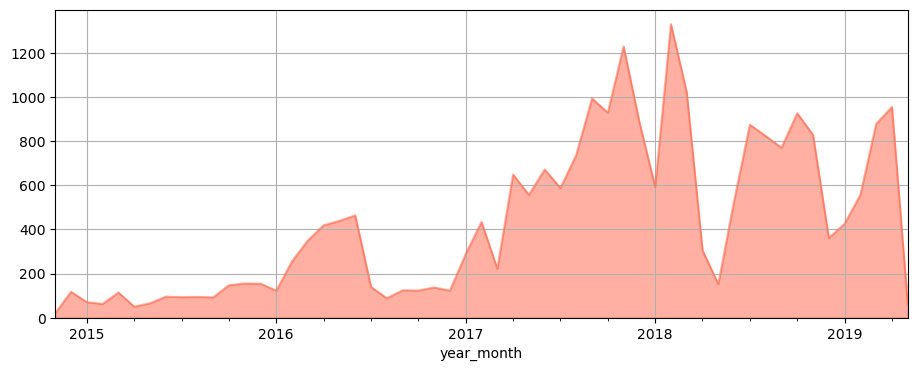

In [22]:
day_per.plot(kind='area',\
             figsize=(11,4),\
             grid=True,\
             alpha=0.5,\
             color='tomato')

По диаграмме сложно сказать верна ли гепотеза, пропущенные значения действительно зависят от даты публикации. Возможно объявления в которых пропущено кол-во дней публикации действительно на момент выгрузки были активны.
Заполним эти пропуски нулями, эти данные не повлияют на наш анализ.

In [23]:
data['days_exposition'] = data['days_exposition'].fillna(0)

- **Пропуски в столбце locality_name вероятно свзяны с ошибкой пользователя, так же возможна ошибка при выгрузке данных.**

Т.к. этих пррпусков всего 49, их будет целесообразно удалить.

In [24]:
#Удалим строки с пропусками и проверим результат.

data.dropna(subset=['locality_name'], inplace=True, axis=0)
print(data['locality_name'].isna().sum())

0


- **Пропуски в столбце floors_total**

Пропсуков в этом столбце всего 86, их так же будет целесообразнее удалить.

In [25]:
#Удалим пропуски и проверим результат.

data.dropna(subset=['floors_total'],inplace = True,axis = 0 )
print(data['floors_total'].isna().sum())

0


- **Пропуски в столбце kitchen_area**.

Площадь кухни вероятно связана с общей площадью квартиры.

In [26]:
#Расчитаем корреляцию

data['kitchen_area'].corr(data['total_area'])

0.6092476784548316

Корреляция есть, заполним пропуски медианным значением в соответсвии с общей площадью, где это возможно.

In [27]:
#Заполним пропуски и проверим результат.

data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].median())

Так же пропуски в столбце могут быть связаны с тем, что квартира является студией и вней 0 комнат. заполним пропуски нулями в строчках, где кол-во комнат  = 0.

In [28]:
data.loc[(data['rooms'] == 0), 'kitchen_area'] = 0.0
data['kitchen_area'].isna().sum()

2011

Оставшиеся пропуски оставим без изменений.

- **Пропуски в столбце living_area**.

Жилая площадь квартиры вероятно зависит от общей площади, если это так, мы сможем заполнить пропуски медианными значениями в соответсвии с строками с общей площадью.

In [29]:
data['living_area'].corr(data['total_area'])

0.9397711143610339

Коэффициент корреляции большой, значит мы можем заполнить пропуски медианным значением.

In [30]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].median())
print(data['living_area'].isna().sum())

1851


Оставшиеся пропуски оставим без изменений.

In [31]:
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1851
floor                      0
studio                     0
open_plan                  0
kitchen_area            2011
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000        5500
parks_nearest           5500
ponds_around3000        5500
ponds_nearest           5500
days_exposition            0
date                       0
year_month                 0
dtype: int64


### **2. Рассмотрим типы данных в каждом столбце**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  object        
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21714 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   studio                23565 non-null  bool          
 10  open_plan             23565 non-null  bool          
 11  kitchen_area          21554 non-null  float64       
 12  balcony               23565 non-null  float64       
 13  locality_name   

Изменим типы данных в столбцах **first_day_exposition**, **floors_total**, **floor**, **balcony**, **parks_around3000**, **ponds_around3000**, **days_exposition**.

In [33]:
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

Данные в остальных столбцах имеют данные, которые невозможно перевести в целочисленный формат (значения NaN, имеют формат float).
Так же необходимо изменить формат столбца с датой на datetime.

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Проверим изменные столбцы.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21714 non-null  float64       
 8   floor                 23565 non-null  int32         
 9   studio                23565 non-null  bool          
 10  open_plan             23565 non-null  bool          
 11  kitchen_area          21554 non-null  float64       
 12  balcony               23565 non-null  int32         
 13  locality_name   

Мы изменили типы данных, для удобства подчетов и построения графиков.

### **3. Изучим уникальные значения в столбце с названиями и проверим наличие неявных дубликатов.**

In [36]:
#Просмотрим уникальные значения

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце действительно есть дубликаты, связанные с написанием населённых пунктов.

In [37]:
#Напишем функцию, которая будет разделять строки по пробелу и добавлять в список наименования начинающиеся с заглавной буквы.

def new_name(row):
    split_name = row.split()
    new_name = []
    for name in split_name:
        if name[0].isupper():
            new_name.append(name)
    new_name = ' '.join(name for name in new_name)
    return new_name

#Применим функцию.

data['locality_name'] = data['locality_name'].apply(new_name)

In [38]:
#Проверим результат.

data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Почти все данные мы исправили, оставшиеся значения не сильно повлияют на наш анализ. Теперь можно приступить к категоризации данных.

In [39]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21714.000000,23565.000000,21554.000000,23565.000000,18041.000000,18064.000000,18065.000000,18065.000000,18065.000000,18065.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.698080,10.675875,34.480394,5.878124,10.471384,0.593677,28797.082701,14192.656056,0.611569,217.376363,0.769499,259.245170,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.237454,6.594823,22.102748,4.871485,5.964767,0.960660,12632.499735,8613.348153,0.802088,330.815071,0.938669,325.295565,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,2.100000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,0.000000,1.000000,16.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,417.000000,1.000000,503.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,2984.000000,3.000000,1344.000000,1580.000000


In [40]:
#Удалим выбивающиеся значения из столбца с комнатами, строк с кол-вом комнат более 10 всего несколько, удалим их

data['rooms'] = data['rooms'].where(~(data['rooms'] >10),10)

In [41]:
#Удалим строки с жилой плозадью менее 6 м. По жилищкому кодексу это минимальное значение площади

data['living_area'] = data['living_area'].where(~(data['living_area'] < 6),6)

In [42]:
#Отсортируем столбец со стоимостью

print(data['last_price'].sort_values())

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
9581        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23565, dtype: float64


In [43]:
#Удалим строчку со стоимостью 12190.00

data['last_price'].drop(index=[8793], axis=0, inplace=True)

## Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы с данными.

- **Цена одного квадратного метра.**

In [44]:
#Разделим столбец стоимости на общую площадь
data['price_one_m'] = data['last_price'] / data['total_area']

In [45]:
#Изменим тип столбца, для более удобной визуализации
data['price_one_m'].astype('int')

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_one_m, Length: 23565, dtype: int32

- **День недели публикации объявления (0 — понедельник, 1 — вторник и так далее).**

In [46]:
#С помощью библиотеки dt добавим столбцы с датами.

data['day_exposition'] = data['first_day_exposition'].dt.weekday

- **Месяц публикации объявления.**

In [47]:
data['month_exposition'] = data['first_day_exposition'].dt.month

- **Год публикации объявления.**

In [48]:
data['year_exposition'] = data['first_day_exposition'].dt.year

- **Тип этажа квартиры.**

In [49]:
#Напишем функцию, которая будет возвращать нужный тип этажа по значению в столбце.

def type_floor_func (row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else: return 'Другой'

In [50]:
#Применим функцию

data['type_floor'] = data.apply(type_floor_func, axis=1)

- **Расстояние до центра города в километрах.**

In [51]:
#Разделим расстояние в метрах на 1000

data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000

In [52]:
#Зполним пропуски в столбце и переведём в целочисленный тип

data['cityCenters_nearest'].max()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(70.0)

Заполним максимальным возможным значением пропуски

In [53]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

- **Удалим ненужные столбцы**

In [54]:
#Удалим ненужные столбцы

data = data.drop(['date', 'year_month'], axis=1)

## Проведите исследовательский анализ данных

### Изучите следующие параметры объектов:

- **Общая площадь, жилая площадь, площадь кухни.**

Text(0.5, 0, 'Площадь')

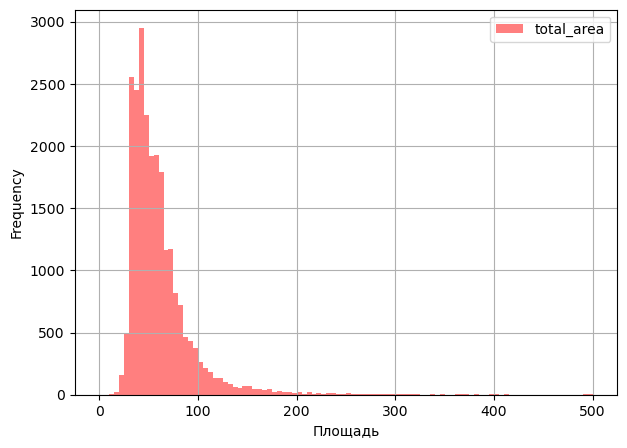

In [55]:
#Построим график для общей площади

data.plot(y='total_area',\
          kind='hist',\
          bins = 100,\
          grid=True,\
          range = (0,500),\
          figsize = (7,5),\
          color='red',\
          alpha=0.5)
plt.xlabel('Площадь')

По графику видно, что наиболее распространённый метраж квартиры это 30-45 метров кв.

Text(0.5, 0, 'Площадь')

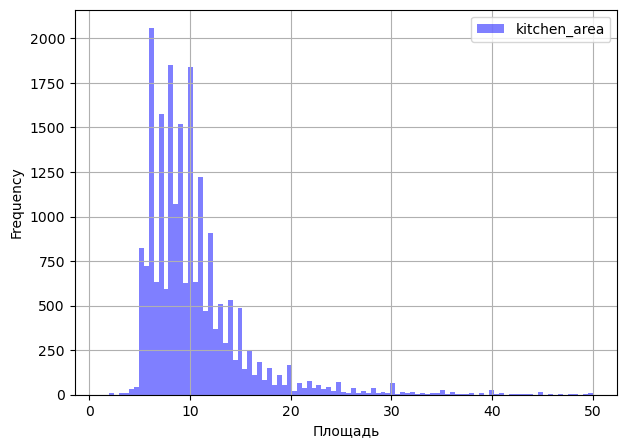

In [56]:
#Построим график для площади кухни

data.plot(y='kitchen_area',\
          kind='hist',\
          bins = 100,\
          grid=True,\
          range = (1,50),\
          figsize = (7,5),\
          color='blue',\
          alpha=0.5)
plt.xlabel('Площадь')

На графике видны некоторые выбивающиеся значения, но в целом самый часто встречающийся размер кухни - 6-12 метров кв.

Text(0.5, 0, 'Площадь')

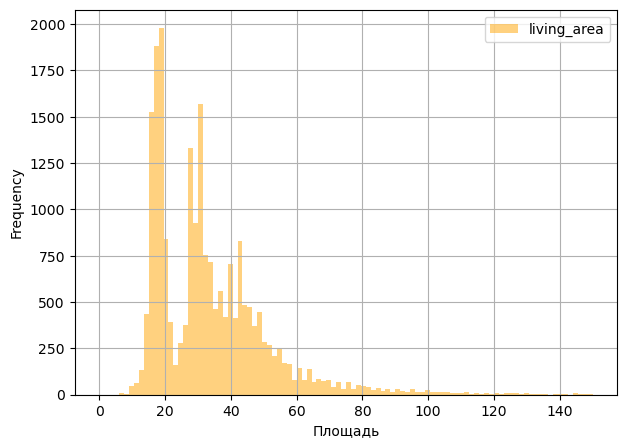

In [57]:
#Построим график для жилой площади

data.plot(y='living_area',\
          kind='hist',\
          bins = 100,\
          grid=True,\
          range = (0,150),\
          figsize = (7,5),\
          color='orange',\
          alpha=0.5)
plt.xlabel('Площадь')

По графику виден пик квартир размером до 20 метров кв.(студии). Помимо этого часто встречаются квартиры от 30 до 50 метров кв.

- **Цена объекта.**

Text(0.5, 0, 'Цена, 10 млн рублей')

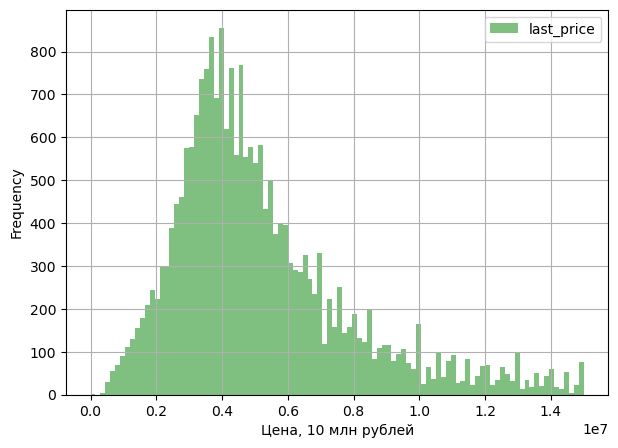

In [58]:
data.plot(y='last_price',\
          kind='hist',\
          bins = 100,\
          grid=True,\
          range = (0,15000000),\
          figsize = (7,5),\
          color='green',\
          alpha=0.5)
plt.xlabel('Цена, 10 млн рублей')

По графику видно, что средняя стоимость от 3 до 5 млн. рублей.

- **Количество комнат**.

Text(0.5, 0, 'Кол-во комнат')

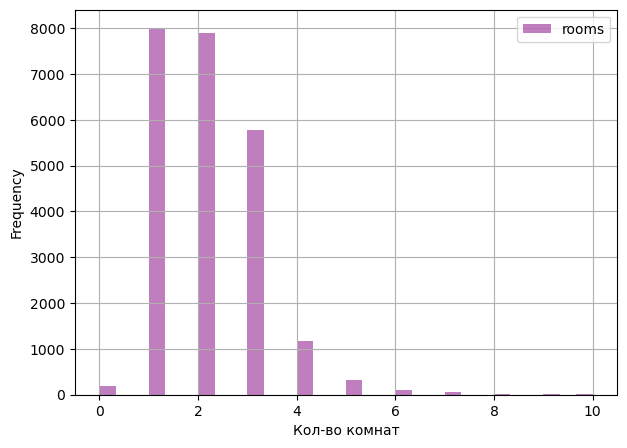

In [59]:
data.plot(y='rooms',\
          kind='hist',\
          bins = 30,\
          grid=True,\
          range = (0,10),\
          figsize = (7,5),\
          color='purple',\
          alpha=0.5)
plt.xlabel('Кол-во комнат')

Наиболее распространены квартиры с одной, двумя и тремя комнатами.

- **Высота потолков.**

Text(0.5, 0, 'Высота потолков')

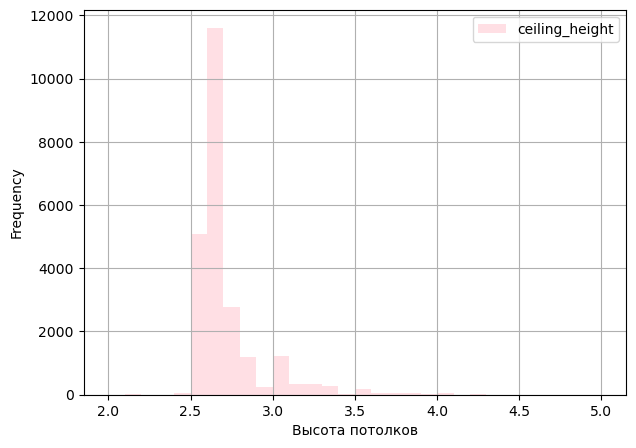

In [60]:
data.plot(y='ceiling_height',\
          kind='hist',\
          bins = 30,\
          grid=True,\
          range = (2,5),\
          figsize = (7,5),\
          color='pink',\
          alpha=0.5)
plt.xlabel('Высота потолков')

Наимболее распространены потолки до 3 метров

- **Этаж.**

Text(0.5, 0, 'Этаж')

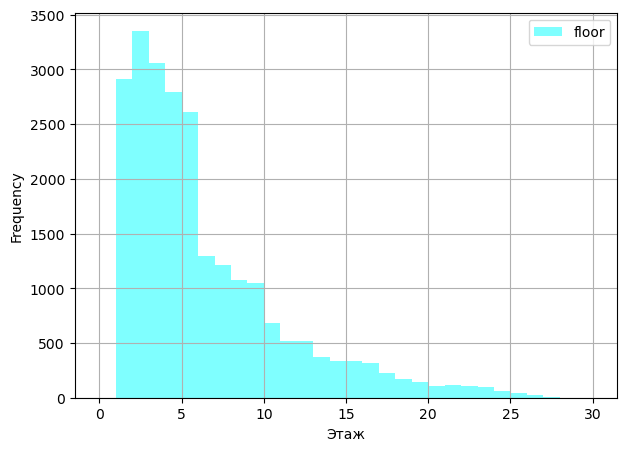

In [61]:
data.plot(y='floor',\
          kind='hist',\
          bins = 30,\
          grid=True,\
          range = (0,30),\
          figsize = (7,5),\
          color='cyan',\
          alpha=0.5)
plt.xlabel('Этаж')

На удивление, наиболее распространён 3-5 этаж.

- **Тип этажа.**

<AxesSubplot:>

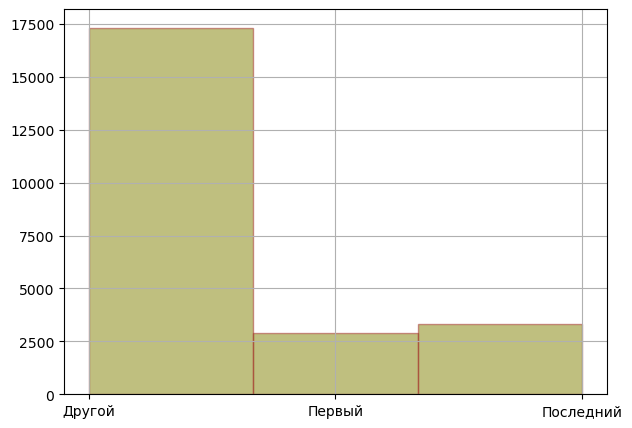

In [62]:
data['type_floor'].hist(bins=3, figsize=(7,5), color='olive', ec='brown', alpha=0.5)

Наиболее распространён "Другой" этаж. Первый и последний этажи немного различаются, в пользу последнего.

- **Всего этажей.**

Text(0.5, 0, 'Всего этажей')

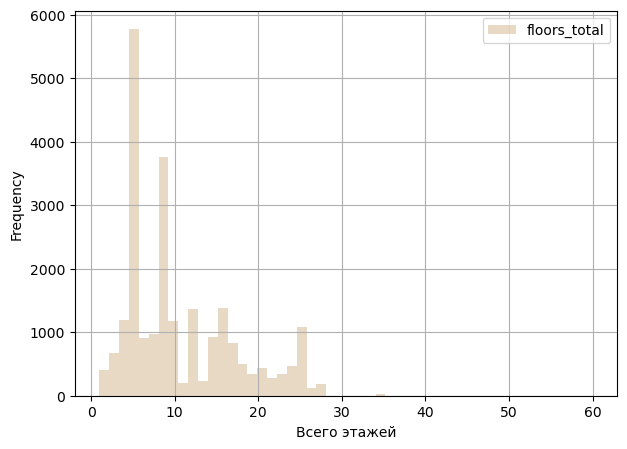

In [63]:
data.plot(y='floors_total',\
          kind='hist',\
          bins = 50,\
          grid=True,\
          range = (1,60),\
          figsize = (7,5),\
          color='tan',\
          alpha=0.5)
plt.xlabel('Всего этажей')

Больше всего распространены пятиэтажки и девятиэтажки.

- **Расстояние до центра города.**

Text(0.5, 0, 'Расстояние, км.')

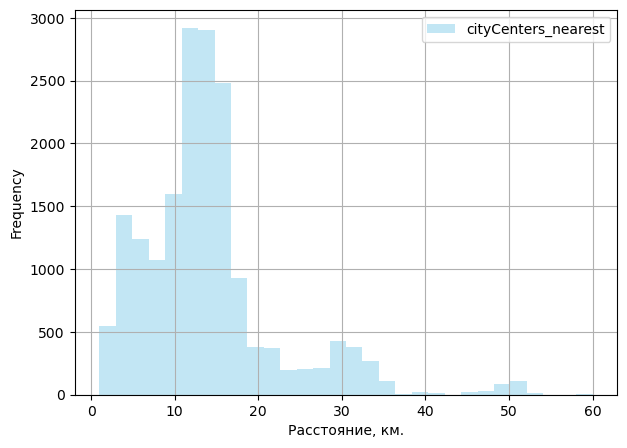

In [64]:
data.plot(y='cityCenters_nearest',\
          kind='hist',\
          bins = 30,\
          grid=True,\
          range = (1,60),\
          figsize = (7,5),\
          color='skyblue',\
          alpha=0.5)
plt.xlabel('Расстояние, км.')

Чаще всего продают квартиры на расстоянии от 3 до 15 км от центра города.

- **Расстояние до аэропорта.**

In [65]:
#Для удобства восприятия переведём расстояние в километры.

data['airports_nearest'] = data['airports_nearest'] / 1000

Построим гистограмму по расстоянию до аэропорта

Text(0.5, 0, 'Расстояние, км.')

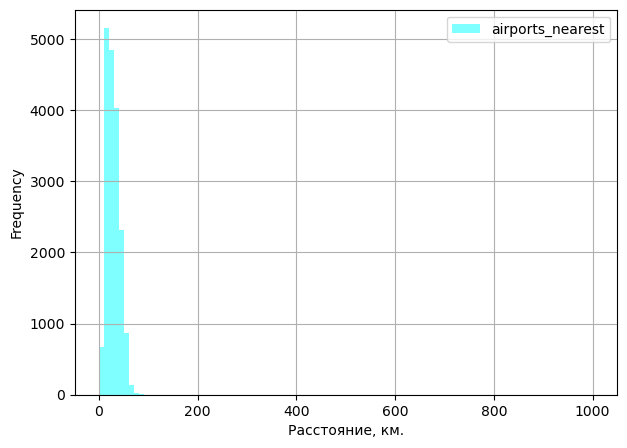

In [66]:
data.plot(y='airports_nearest',\
          kind='hist',\
          bins = 100,\
          grid=True,\
          range = (1,1000),\
          figsize = (7,5),\
          color='aqua',\
          alpha=0.5)
plt.xlabel('Расстояние, км.')

Чаще всего квартиры на расстоянии от 100 до 250 км. от аэропорта.

- **Расстояние до парка.**

In [67]:
#Для удобства так же переведём расстояние в километры

data['parks_nearest'] = data['parks_nearest'] / 100

Text(0.5, 0, 'Расстояние, км.')

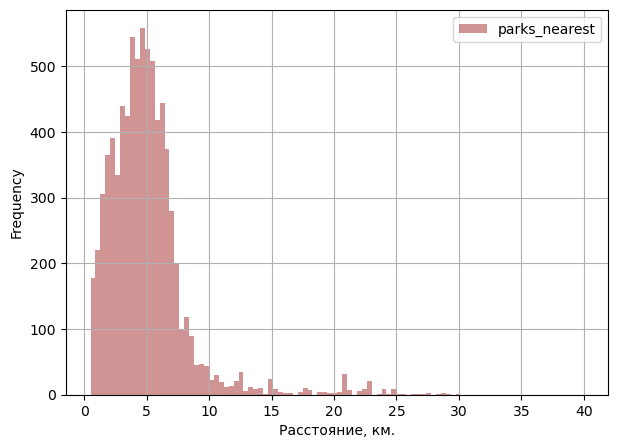

In [68]:
data.plot(y='parks_nearest',\
          kind='hist',\
          bins = 100,\
          grid=True,\
          range = (0.5,40),\
          figsize = (7,5),\
          color='brown',\
          alpha=0.5)
plt.xlabel('Расстояние, км.')

В большинстве объявлений парк находится на расстоянии от 500 метров до 6 км.

- **День и месяц.**

<AxesSubplot:ylabel='Frequency'>

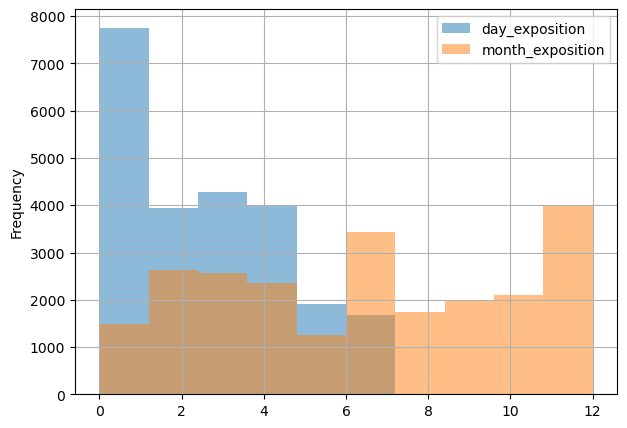

In [69]:
data.plot(y=['day_exposition','month_exposition'],\
          kind='hist',\
          bins = 10,\
          grid=True,\
          range = (0,12),\
          figsize = (7,5),\
          alpha=0.5)

Как видно из графика часто выставляют объявления в понедельник и значительно реже в воскрнесенье.
По месяцам года есть небольшие подъёмы в конце зимы, начале лета и, как ни странно, в декабре.

### Изучите, как быстро продавались квартиры

Построим гистограмму и посмотрим за сколько дней в среднем продаются квартиры. 

Text(0.5, 0, 'Кол-во дней')

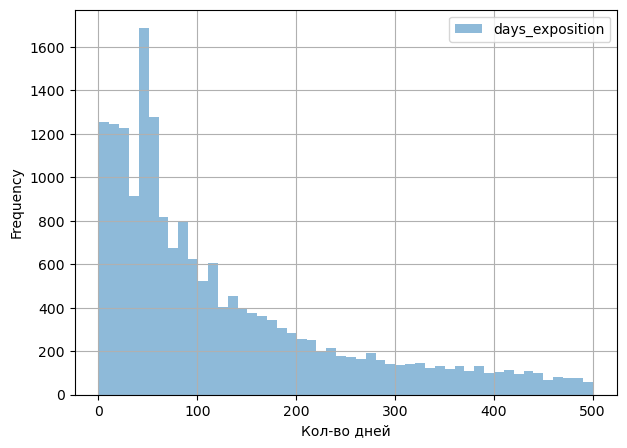

In [70]:
data.plot(y='days_exposition',\
          kind='hist',\
          bins = 50,\
          grid=True,\
          range = (1,500),\
          figsize = (7,5),\
          alpha=0.5)
plt.xlabel('Кол-во дней')

In [71]:
#Расчитаем медиану и среднее значение 

print(data['days_exposition'].median())
print(data['days_exposition'].mean())

73.0
156.42011457670273


Как видно из графика и подсчётов, объявления в среднем продаются за три месяца. Есть выбивающиеся значения более года. Не особо понятно, реальная ли это картина. Есть ограничение на время выставления объявления, но система могла считать и повторно выставленные объявления.

Быстрыми продажами можно считать продажи за неделю, а необычно долгими продажи более года.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

- **Общая плошадь.**

0.3025706554796683


Text(0, 0.5, 'Стоимость млн. за метр')

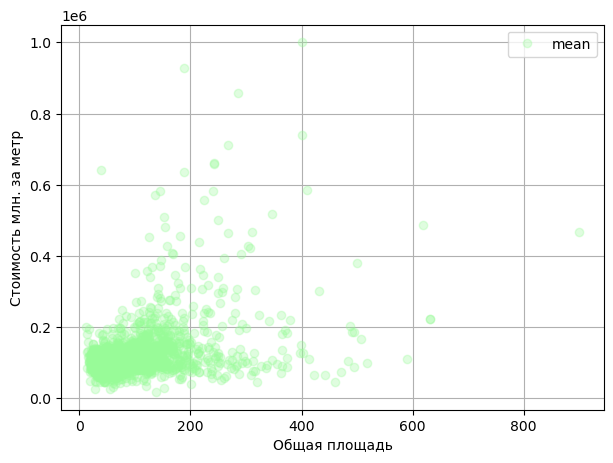

In [72]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем среднее значение цены за 1 метр.

price_total_area = data.pivot_table(index='total_area', values='price_one_m', aggfunc='mean')
price_total_area.columns = ['mean']


print(data['total_area'].corr(data['price_one_m']))

#Построим точечный график
price_total_area.plot(y='mean',\
          style= 'o',\
          grid=True,\
          figsize = (7,5),\
          alpha=0.3,\
          color='palegreen')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость млн. за метр')

Зависимость цены от общей площади небольшая, но всё же можно сказать, что с площадью не сильно увеличивается цена.

- **Жилая площадь**

0.05582278706418913


Text(0, 0.5, 'Стоимость млн. за метр')

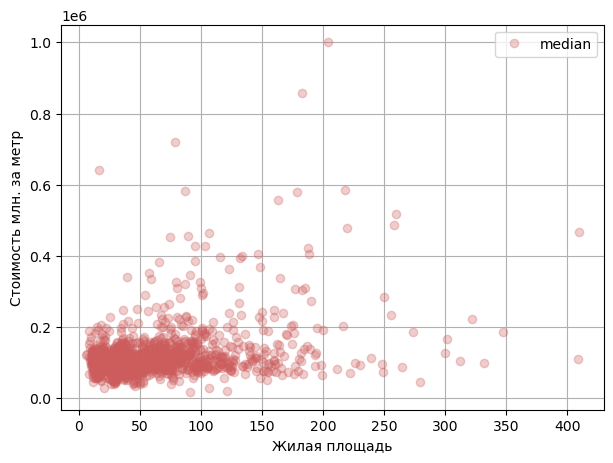

In [73]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.

price_living_area = data.pivot_table(index='living_area', values='price_one_m', aggfunc='median')
price_living_area.columns = ['median']

print(data['rooms'].corr(data['price_one_m']))

#Построим точечный график
price_living_area.plot(y='median',\
          style= 'o',\
          grid=True,\
          figsize = (7,5),\
          alpha=0.3,\
          color='indianred')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость млн. за метр')

Зависимость цены от жилой площади ещё меньше. По этому графику можно сказать, что зависимость минимальная.

- **Площадь кухни**

0.05582278706418913


Text(0, 0.5, 'Стоимость за метр')

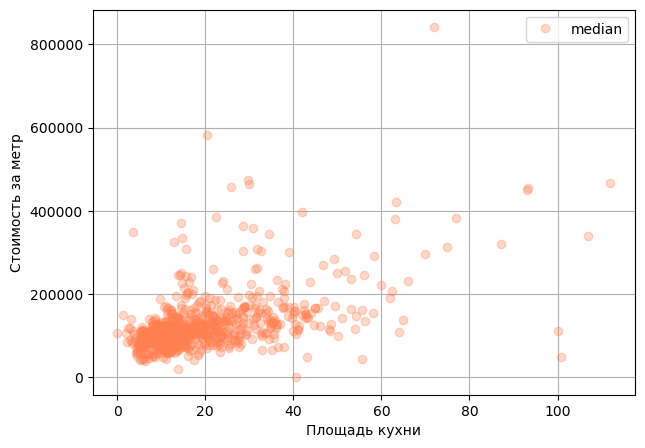

In [74]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.

price_kitchen_area = data.pivot_table(index='kitchen_area', values='price_one_m', aggfunc='median')
price_kitchen_area.columns = ['median']

print(data['rooms'].corr(data['price_one_m']))

#Построим точечный график
price_kitchen_area.plot(y='median',\
          style= 'o',\
          grid=True,\
          figsize = (7,5),\
          alpha=0.3,\
          color='coral')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость за метр')

А вот зависимость от площади кухни есть, пока кухня до 20 метров. Чем больше кухня, тем больше цена, но у кухонь бьольше 20 метров зависимость практически не прослеживается. Линейная зависимость крайне мала.

- **Количество комнат**

0.05582278706418913


Text(0, 0.5, 'Стоимость за метр')

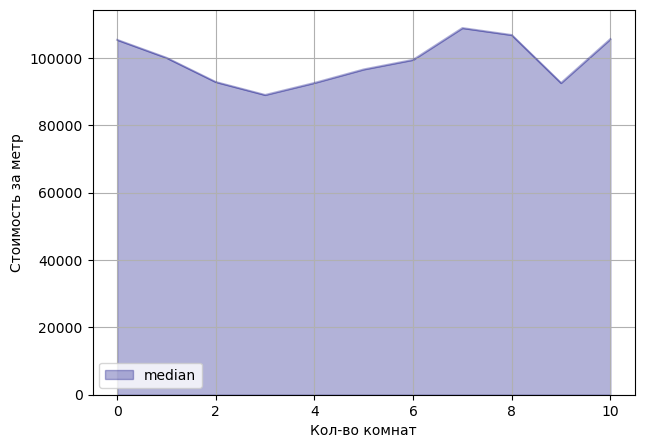

In [75]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.


price_rooms = data.pivot_table(index='rooms', values='price_one_m', aggfunc='median')
price_rooms.columns = ['median']

print(data['rooms'].corr(data['price_one_m']))

#Построим линейный график
price_rooms.plot(y='median',\
          kind= 'area',\
          grid=True,\
          figsize=(7,5),\
          alpha=0.3,\
          color='navy')
plt.xlabel('Кол-во комнат')
plt.ylabel('Стоимость за метр')

Интересно, что количество комнат, когда их до трёх отрицательно влияет на стоимость (чем больше комнат, тем меньше стоимость). Но, если комнат более трёх, то стоимость увеличивается с кол-вом комнат, пока их до восьми. Здесь так же линейная зависимость очень мала.

- **Тип этажа**

Text(0, 0.5, 'Стоимость за метр')

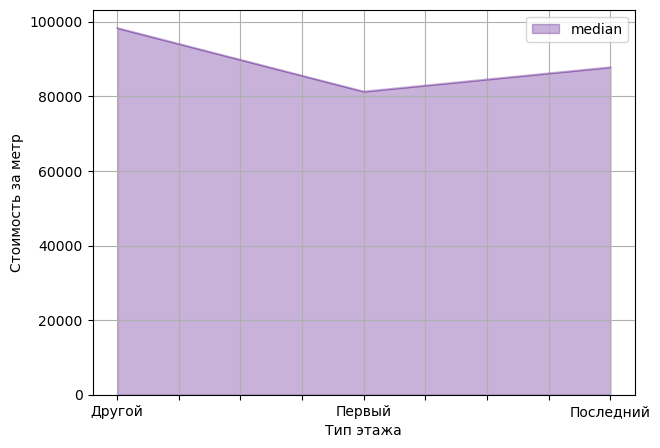

In [76]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.


price_type_floor = data.pivot_table(index='type_floor', values='price_one_m', aggfunc='median')
price_type_floor.columns = ['median']

#Построим линейный график


price_type_floor.plot(y='median',\
          kind= 'area',\
          grid=True,\
          figsize=(7,5),\
          alpha=0.3,\
          color='indigo')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость за метр')

Квартиры на первом этаже стоят дешевле всех. Между квартирами на последнем этаже и других этажах, есть небольшая разница, в пользу последних.

- **День недели**

Text(0, 0.5, 'Стоимость за метр')

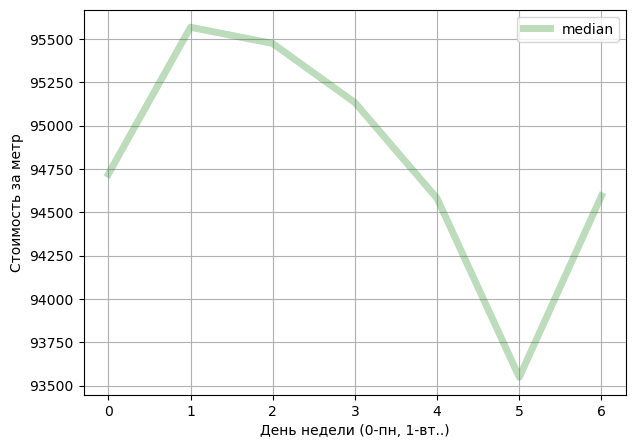

In [77]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.


price_d = data.pivot_table(index='day_exposition', values='price_one_m', aggfunc='median')
price_d.columns = ['median']

#Построим линейный график


price_d.plot(y='median',\
          style='-',\
          grid=True,\
          figsize=(7,5),\
          alpha=0.3,\
          color='forestgreen',\
          linewidth=5)
plt.xlabel('День недели (0-пн, 1-вт..)')
plt.ylabel('Стоимость за метр')

Стоимость квартиры снижается, если она выставлена во вторник и позже. Интересно, что самые дорогие квартиры чаще выставляют во вторник.

- **Месяц продажи**

Text(0, 0.5, 'Стоимость за метр')

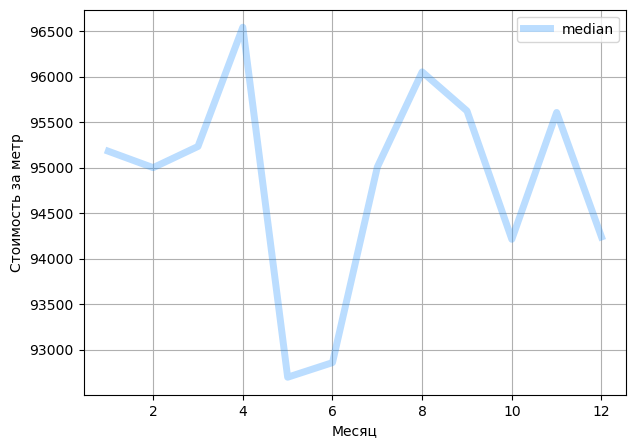

In [78]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.


price_m = data.pivot_table(index='month_exposition', values='price_one_m', aggfunc='median')
price_m.columns = ['median']

#Построим линейный график


price_m.plot(y='median',\
          style='-',\
          grid=True,\
          figsize=(7,5),\
          alpha=0.3,\
          color='dodgerblue',\
          linewidth=5)
plt.xlabel('Месяц')
plt.ylabel('Стоимость за метр')

Рынок недвижимости растёт к весне, затем резко падает до лета. Это объяснимо, люди чаще продают квартиры с наступлением тепла, соответсвенно и медианная стоимость растёт летом. Затем мы видим небольшой спад осенью и пик в ноябре. Вероятно это люди, которые пытаются продать недвижимость по хорошей цене перед Новым годом. В декабре, ожидаемо, стоимость квартир снижается.

- **Год продажи**

Text(0, 0.5, 'Стоимость за метр')

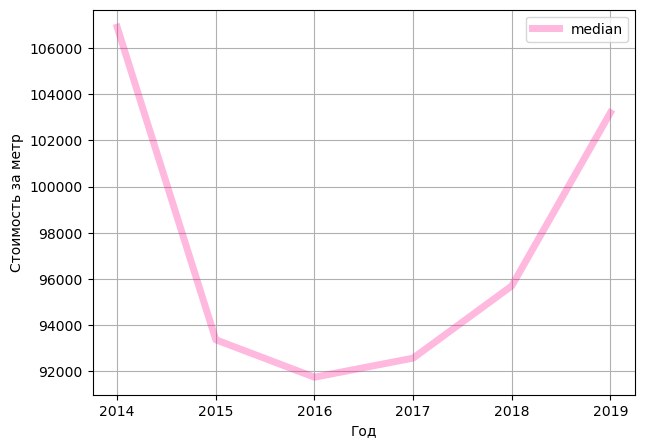

In [79]:
#Создадим новую переменную и добавим в неё сводную таблицу, для которой расчитаем медианное значение цены за 1 метр.


price_y = data.pivot_table(index='year_exposition', values='price_one_m', aggfunc='median')
price_y.columns = ['median']

#Построим линейный график


price_y.plot(y='median',\
          style='-',\
          grid=True,\
          figsize=(7,5),\
          alpha=0.3,\
          color='deeppink',\
          linewidth=5)
plt.xlabel('Год')
plt.ylabel('Стоимость за метр')

Стоимость квартир с 2014 года резко падала, это вероятно связано с кризисом и резко выросшей в два раза стоимостью валюты. Затем, после 2016 года наблюдается уверенный подъём стоимость квартир.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [80]:
#Создадим новую переменную, в которую добавим сводную таблицу, расчитаем среднюю стоимость и кол-во объектов для locality_name

price_locality = data.pivot_table(index='locality_name', values='price_one_m', aggfunc=['count','mean'])
price_locality.columns = ['count', 'mean']

#Отсортируем по убыванию кол-ва и оставим 10 локаций

price_locality = price_locality.sort_values('count', ascending=False).head(10)

#Выведем все 10 населённых пунктов.
display(price_locality)

#Расчитаем максимальную и минимальную среднюю стоимость за кв. метр
display(price_locality[price_locality['mean'] == price_locality['mean'].max()])
display(price_locality[price_locality['mean'] == price_locality['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877341
Мурино,586,86041.116064
Кудрово,470,95260.846171
Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458
Гатчина,307,68746.146763


,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877341


,count,mean
locality_name,,
Выборг,237,58141.909153


Как мы видим самая дорогая недвижимость в Петербурге, затем в топе оказались пригороды города с новостройками.
Наименьшая стоимость в Выборге, вероятно из-за наибольшей удаленности от города, тем не менее объявлений там достаточное кол-во.

### Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 

In [81]:
#Так же создадим переменную, применим к ней фильтраюцию и составим сводную таблицу, с средней стоимостью км для СПб


price_km = data.query('locality_name == "Санкт-Петербург" and  cityCenters_nearest != 70')\
.pivot_table(index='cityCenters_nearest', values='price_one_m', aggfunc='mean')

price_km.columns=['mean']

#Выведем резуьтат 
display(price_km)

,mean
cityCenters_nearest,
0,187324.130319
1,166603.755531
2,146662.860056
3,129526.934854
4,137413.428334
5,146978.313310
6,152277.893519
7,141399.731456
8,120539.122163


В среднем стоимость с каждым километром от центра уменьшается на 10 000 за метр.

Text(0, 0.5, 'Стоимость за метр, млн.')

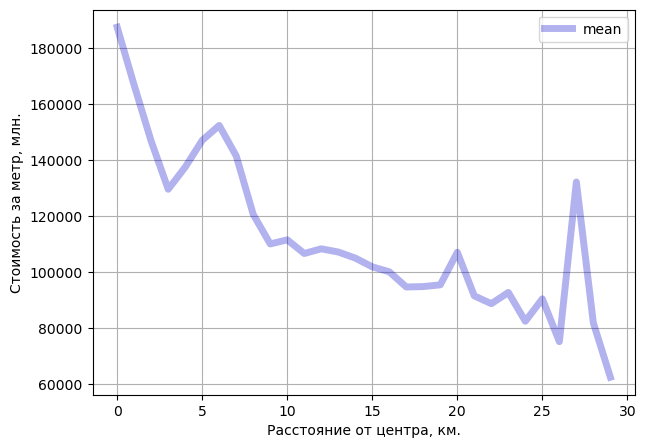

In [82]:
#Для наглядности построим график

price_km.plot(y='mean',\
          style='-',\
          grid=True,\
          figsize=(7,5),\
          alpha=0.3,\
          color='mediumblue',\
          linewidth=5)
plt.xlabel('Расстояние от центра, км.')
plt.ylabel('Стоимость за метр, млн.')

Из графика так же видно, что стоимость уменьшается вместе с увеличением расстояния от центра, есть некоторые выбросы, вероятно премиальная недвижимость.

# Общий вывод

Мы провели анализ недвижимости в Петербурге и Ленинградкой области. Изначально обработкали и подготовили данные для анализа. Изучили выбросы, дубликаты, пропуски, уникальные значения. Исправили все искажения, критически влияющие на наш анализ.

По итогу анализа можно сказать, что в целом рынок недвижимости в Петербурге логичен и понятен.

**Выяснилось, что на стоимость влияют многие факторы и характеристики квартиры. Такие как:** 

- Общая площадь

Мы увидели небольшую кореляцию, стоимость увеличивалась с размером квартиры.

- Площадь кухни

Площадь кухни так же увеличивалась вместе с стоимостью, но до размера 20м. затем проследить зависимость трудно.

- Этаж

Наиболее благоприятно на стоимость влиял последний или другой этаж. Квартиры на первом этажи стоили дешевле.


- Расстояние до центра города

Чем ближе квартра к центру города, тем более высокая у неё стоимость, что логично.

**Так же мы увидели интересное влияние дня недели, месяца и года, на стоимость объявления.**

Дороже всего оценивали свои квартиры, люди выставляющие объявления во вторник. Затем, до пятницы стоимость выставленных квартир снижалась. 
Так же мы выяснили, что летом квартиры стоят дороже всего, это вероятно связа с общим кол-вом продаваемых квартир, ведь многие хотят продать/приобрести недвижимость летом. Интересно, что в ноябре стоимость так же увеличивается, вероятно продавцы надеятся до нового года продать квартры по-дороже.

**Узнали зависимость стоимости в городе и области**

Ожидаемо, в Петербурге квартиры стоят дороже, чем в области. На следущтх местах по стоимости расположились ближайшие пригороды, с новостройками. Это так же объяснимо, эти пригороды совсем близко к городу, в некоторых из них есть метро, что делает жизнь в них относительно комфортным.

**Выяснили среднее кол-во дней, за которое продаётся квартира**

Квартиры в среднем продаются за три месяца, есть некоторые продажи, менее, чем за неделю и более чем за год. Эти выбросы сложно объяснить. Возможно, это действительно правда, возможно произошла ошибка, при выгрузке данных. Все таки при первичной обработке мы увидели большое кол-во пропусков и выбивающихся значений.